# Check Demo

In [39]:
import h5py 

datapath = "/home/nvidia/rby1_ws/rby1-data-collection/data/sample.h5"



In [40]:
f = h5py.File(datapath, 'r')

In [41]:
f.keys()
print(f['head_rgb'].keys())

print(f['head_rgb/image'].shape)

sample_frame = f['head_rgb/image'][-1].squeeze()
print(sample_frame.shape)
import numpy as np 
np.min(sample_frame), np.max(sample_frame)

print(f['head_rgb/time'].shape)

<KeysViewHDF5 ['image', 'time']>
(21, 480, 640, 3)
(480, 640, 3)
(21,)


In [42]:
import imageio 

frames = f['head_rgb/image'][()]

imageio.mimwrite('sample.mp4', frames, fps=10)

In [43]:
from PIL import Image 

img = Image.fromarray(sample_frame ) 
img.show()

In [44]:
print(f['samples'].keys())
print(f['samples/time'].shape)

for k in f['samples'].keys(): 
    print(f"{k} : {f['samples'][k].shape}")


head_ts = f['head_rgb/time'][()]
prop_ts = f['samples/time'][()]

print(type(head_ts))

print(head_ts.shape[0])

<KeysViewHDF5 ['gripper_state', 'gripper_target', 'robot_position', 'time']>
(21,)
gripper_state : (21, 2)
gripper_target : (21, 2)
robot_position : (21, 24)
time : (21,)
<class 'numpy.ndarray'>
21


error.shape=(21,)


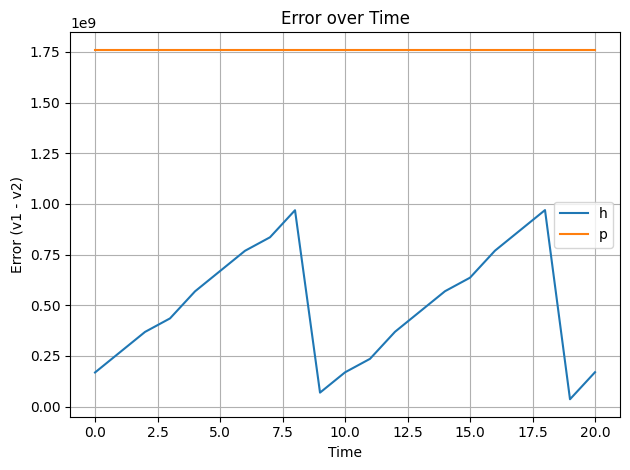

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs:
# t  : np.ndarray of shape (N,)  -> timestamps (e.g., seconds)
# v1 : np.ndarray of shape (N,)  -> first signal values
# v2 : np.ndarray of shape (N,)  -> second signal values

# Example placeholders (remove if you already have t, v1, v2):
# t  = np.linspace(0, 10, 1000)
# v1 = np.sin(t)
# v2 = np.sin(t + 0.1) + 0.05

# Compute error (difference)
error = head_ts - prop_ts          # signed error

print(f"{error.shape=}")

plt.figure()
# plt.plot(error, linewidth=1.5)
plt.plot(head_ts, label='h')
plt.plot(prop_ts, label='p')
plt.xlabel("Time")
# plt.ylabel("Error (v1 - v2)")
plt.title("Error over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [46]:
1140 / 30

38.0

Datasets: ['gripper_state', 'gripper_target', 'robot_position', 'time']
gripper_state: (21, 2)


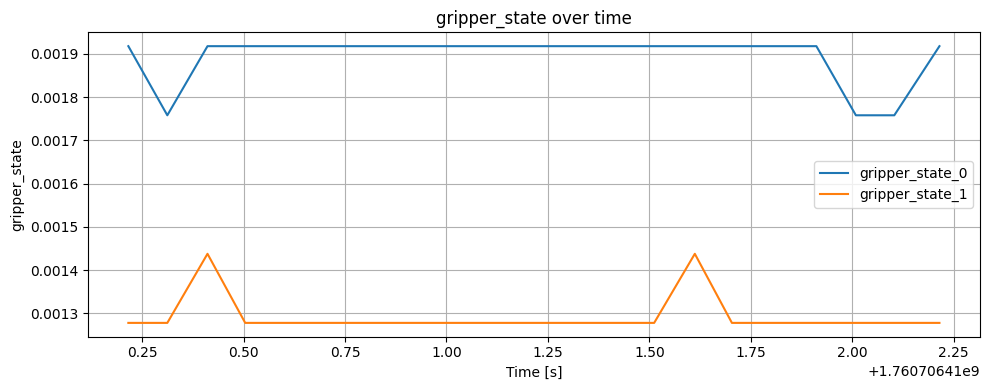

gripper_target: (21, 2)


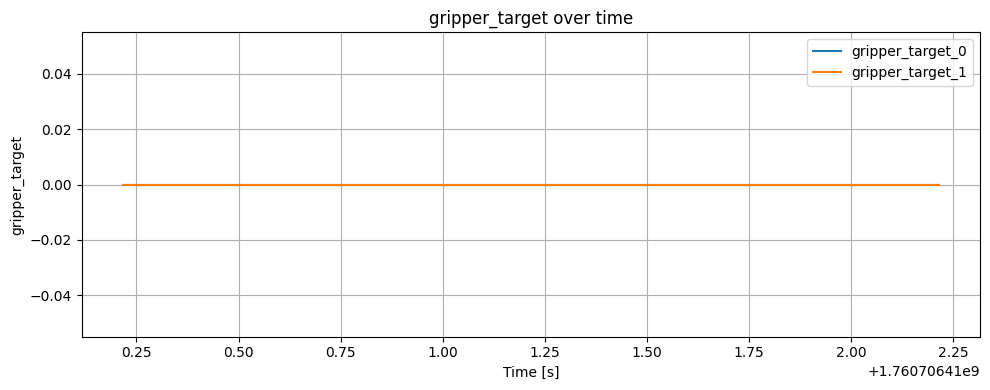

In [47]:
import matplotlib.pyplot as plt
import numpy as np

group = f["samples"]
print("Datasets:", list(group.keys()))

# time axis
t = group["time"][:] if "time" in group else np.arange(len(next(iter(group.values()))))

# get all keys except 'time'
keys = [k for k in group.keys() if k != "time"]

# only take first two datasets
for key in keys[:2]:
    data = np.array(group[key])
    print(f"{key}: {data.shape}")

    plt.figure(figsize=(10, 4))
    if data.ndim == 1:
        plt.plot(t, data, label=key)
    elif data.ndim == 2:
        for i in range(min(data.shape[1], 2)):  # limit to first 10 columns
            plt.plot(t, data[:, i], label=f"{key}_{i}")
    plt.xlabel("Time [s]" if "time" in group else "Index")
    plt.ylabel(key)
    plt.title(f"{key} over time")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
